In [1]:
import warnings
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Activation, Dense, GlobalAveragePooling2D
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.compat.v1.reset_default_graph()
warnings.simplefilter(action='ignore', category=FutureWarning)


2024-01-24 08:51:51.638806: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-24 08:52:06.290935: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-24 08:52:06.293554: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-24 08:52:12.709641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load and  Modify MobileNetV2 Model

In [2]:
# Download the MobileNet Model

mobile = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3))

In [3]:
def create_model(unit):
    x = mobile.layers[-2].output
    output = Dense(units=unit, activation='softmax')(x)
    model = Model(inputs=mobile.input, outputs=output)
    for layer in model.layers:
        layer.trinable = False

    return model

In [4]:
# Instantiate the Classifier Model (model) and the Breed and Age Classifier Model (model_1)
model = create_model(unit=15)
model_1 = create_model(unit=16)

## Data Preparation

### 1. Classifier

In [5]:
train_path ='/home/kelvin/Desktop/maina/project/classifier-data/train'
val_path = '/home/kelvin/Desktop/maina/project/classifier-data/val'
test_path = '/home/kelvin/Desktop/maina/project/classifier-data/test'

# Define the data generator
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

# Generate the image batches for the training, validation, and test datasets
train_batches = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

val_batches = datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_batches = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=38,
    class_mode='categorical',
    shuffle=False
)

Found 1538 images belonging to 15 classes.
Found 453 images belonging to 15 classes.
Found 218 images belonging to 15 classes.


### 2. Breed & Age Classifier

In [6]:
train_path_1 ='/home/kelvin/Desktop/maina/project/breed-age-data/data/train'
val_path_1 = '/home/kelvin/Desktop/maina/project/breed-age-data/data/val'
test_path_1 = '/home/kelvin/Desktop/maina/project/breed-age-data/data/test'

# Define the data generator
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

# Generate the image batches for the training, validation, and test datasets
train_batches_1 = datagen.flow_from_directory(
    train_path_1,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

val_batches_1 = datagen.flow_from_directory(
    val_path_1,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_batches_1 = datagen.flow_from_directory(
    test_path_1,
    target_size=(224, 224),
    batch_size=38,
    class_mode='categorical',
    shuffle=False
)

Found 854 images belonging to 16 classes.
Found 256 images belonging to 16 classes.
Found 265 images belonging to 16 classes.


## Train the Models

In [8]:
def train_fit(model, x, y, epoch=8):
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x=x, validation_data=y, epochs=epoch, verbose=2)

In [9]:
hist = train_fit(model=model,x=train_batches, y=val_batches)
hist_1 = train_fit(model=model_1,x=train_batches_1, y=val_batches_1)

Epoch 1/8


/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 - 193s - loss: 1.6673 - accuracy: 0.6443 - val_loss: 1.5936 - val_accuracy: 0.6954 - 193s/epoch - 2s/step
Epoch 2/8
97/97 - 192s - loss: 0.2192 - accuracy: 0.9298 - val_loss: 0.6655 - val_accuracy: 0.8212 - 192s/epoch - 2s/step
Epoch 3/8
97/97 - 182s - loss: 0.1083 - accuracy: 0.9597 - val_loss: 0.6405 - val_accuracy: 0.8433 - 182s/epoch - 2s/step
Epoch 4/8
97/97 - 186s - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.5696 - val_accuracy: 0.8609 - 186s/epoch - 2s/step
Epoch 5/8
97/97 - 184s - loss: 0.0523 - accuracy: 0.9876 - val_loss: 0.5049 - val_accuracy: 0.8830 - 184s/epoch - 2s/step
Epoch 6/8
97/97 - 184s - loss: 0.0315 - accuracy: 0.9922 - val_loss: 1.4216 - val_accuracy: 0.7572 - 184s/epoch - 2s/step
Epoch 7/8
97/97 - 184s - loss: 0.0709 - accuracy: 0.9831 - val_loss: 0.5849 - val_accuracy: 0.8609 - 184s/epoch - 2s/step
Epoch 8/8
97/97 - 182s - loss: 0.1174 - accuracy: 0.9720 - val_loss: 1.2411 - val_accuracy: 0.7947 - 182s/epoch - 2s/step
Epoch 1/8
54/54 - 110s - loss: 2.7

## Test the trained Models

### 1. Classifier Model

In [10]:
test_labels  = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_batches)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

6/6 [==============================] - 7s 965ms/step - loss: 0.4741 - accuracy: 0.9037
Test Loss: 0.47406503558158875
Test Accuracy: 0.9036697149276733


### 2. Breed & Age Classifier Model

In [11]:
test_labels_1  = test_batches_1.classes
predictions_1 = model_1.predict(x=test_batches_1, verbose=0)

# Evaluate on the test set
test_loss_1, test_accuracy_1 = model_1.evaluate(test_batches_1)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss_1}')
print(f'Test Accuracy: {test_accuracy_1}')

7/7 [==============================] - 7s 912ms/step - loss: 0.3086 - accuracy: 0.9170
Test Loss: 0.30864381790161133
Test Accuracy: 0.9169811606407166


## Classes Definition

In [12]:
classes_1 = {0:'abyssinian horse',
 1:'adaev horse',
 2:'aegidienberger horse',
 3:'aging man', 4:'aging woman', 5:'american cat', 6:'boerboel dog', 7:'bulldog', 8:'chihuahua', 9:'egyptian mau cat',
 10:'german shepherd', 11:'infant', 12:'man',13:'sokoke cat', 14:'teenage boy', 15:'teenage girl'}
def class_pred(predictions):
    return classes_1[predictions]

In [13]:
classes = {
 0: "aeroplane",
 1:"ball", 2:"car", 3:"cat", 4:"dog", 5:'frog', 6:'girl', 7:'horse',
 8:'infant', 9:'laptop', 10:'man', 11:'puppy', 12:'river', 13:'track',
 14:'woman'}
def class_predicted(predictions):
    return classes[predictions]

In [22]:
#printing the labels for classes_1
def print_class_labels():
    for class_number, label in classes_1.items():
        print(f"{class_number}: '{label}'")

# Print all class labels
print_class_labels()

0: 'abyssinian horse'
1: 'adaev horse'
2: 'aegidienberger horse'
3: 'aging man'
4: 'aging woman'
5: 'american cat'
6: 'boerboel dog'
7: 'bulldog'
8: 'chihuahua'
9: 'egyptian mau cat'
10: 'german shepherd'
11: 'infant'
12: 'man'
13: 'sokoke cat'
14: 'teenage boy'
15: 'teenage girl'


In [14]:
def print_class_labels():
    for class_number, label in classes.items():
        print(f"{class_number}: '{label}'")

# Print all class labels
print_class_labels()

0: 'aeroplane'
1: 'ball'
2: 'car'
3: 'cat'
4: 'dog'
5: 'frog'
6: 'girl'
7: 'horse'
8: 'infant'
9: 'laptop'
10: 'man'
11: 'puppy'
12: 'river'
13: 'track'
14: 'woman'


In [22]:
#print index sample
def class_predicted(predictions):
    return classes[predictions]

predicted_class_index = 9

predicted_class_label = class_predicted(predicted_class_index)

print(predicted_class_label)

laptop


## Predictions

In [17]:
# def make_predictions(img_path, model=model, model_1=model_1):

def make_predictions(img_path, model=model, model_1=model_1):

    classes_2 = ['cat', 'horse', 'dog']
    classes_3 = ['girl', 'man', 'woman']

    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)

        # Make a prediction
        predictions = model.predict(img_array)

        # Get the predicted class index
        predicted_class_index = np.argmax(predictions[0])

        # Map the predicted class index to a label
        predicted_class_label = class_predicted(predicted_class_index)
        print(predicted_class_label)

        if predicted_class_label in classes_2:
            pred = model_1.predict(img_array)
            predicted_class_index_1 = np.argmax(pred[0])
            predicted_class_label_1 = class_pred(predicted_class_index_1)

            # Display the image with predicted class and breed
            img_rgb = image.img_to_array(img)
            img_rgb /= 255.0  # Normalize the image
            plt.imshow(img_rgb)
            plt.title(f"Predicted class: {predicted_class_label}\nBreed: {predicted_class_label_1}")
            plt.show()

        elif predicted_class_label in classes_3:
            pred = model_1.predict(img_array)
            predicted_class_index_1 = np.argmax(pred[0])
            predicted_class_label_1 = class_pred(predicted_class_index_1)

            # Display the imae with predicted class and age group
            img_rgb = image.img_to_array(img)
            img_rgb /= 255.0  # Normalize the image
            plt.imshow(img_rgb)
            plt.title(f"Predicted class: {predicted_class_label}\nAge Group: {predicted_class_label_1}")
            plt.show()

        else:
            # Display the image with only predicted class
            img_rgb = image.img_to_array(img)
            img_rgb /= 255.0  # Normalize the image
            plt.imshow(img_rgb)
            plt.title(f"Predicted class: {predicted_class_label}")
            plt.show()

    except FileNotFoundError:
        print("Error: Image not loaded. Not available.")


1/1 [==============================] - 0s 49ms/step
dog
1/1 [==============================] - 0s 41ms/step


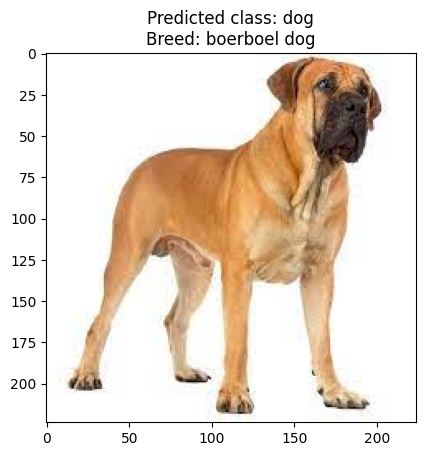

In [24]:
make_predictions(img_path="/home/kelvin/Desktop/maina/project/test data/boerboel11.jpg")

In [1]:
model.save('MobileNet_beta_FineTuned_Model.h5')


NameError: name 'model' is not defined

In [2]:
loaded_model = tf.keras.models.load_model('MobileNet_beta_FineTuned_Model.h5')

NameError: name 'tf' is not defined